In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import numpy as np
import os

In [33]:
os.chdir('trainingData/datasets')
classes = [name for name in os.listdir(".") if os.path.isdir(name)]
len(classes)

82

In [34]:
train_path = '/Users/ssharlin/Desktop/hackUMBC/trainingData/datasets'

In [35]:
train_datagen = ImageDataGenerator(
    rescale = 1./255, 
    shear_range = 0.2, 
    zoom_range = 0.2,
    validation_split = 0.25
)
train_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = classes,
    shuffle = True,
    subset='training',
    seed = 123
)

test_set = train_datagen.flow_from_directory(
    train_path, 
    target_size = (45, 45), 
    color_mode = 'grayscale',
    batch_size = 32,
    class_mode = 'categorical',
    classes = classes,
    shuffle = True,
    subset='validation',
    seed = 123
)


Found 282007 images belonging to 82 classes.
Found 93967 images belonging to 82 classes.


In [36]:
classes

['beta',
 'pm',
 'Delta',
 'gamma',
 'infty',
 'rightarrow',
 'div',
 'gt',
 'forward_slash',
 'leq',
 'mu',
 'exists',
 'in',
 'times',
 'sin',
 'R',
 'u',
 '9',
 '0',
 '{',
 '7',
 'i',
 'N',
 'G',
 '+',
 ',',
 '6',
 'z',
 '}',
 '1',
 '8',
 'T',
 'S',
 'cos',
 'A',
 '-',
 'f',
 'o',
 'H',
 'sigma',
 'sqrt',
 'pi',
 'int',
 'sum',
 'lim',
 'lambda',
 'neq',
 'log',
 'ldots',
 'forall',
 'lt',
 'theta',
 'ascii_124',
 'M',
 '!',
 'alpha',
 'j',
 'C',
 ']',
 '(',
 'd',
 'v',
 'prime',
 'q',
 '=',
 '4',
 'X',
 'phi',
 '3',
 'tan',
 'e',
 ')',
 '[',
 'b',
 'k',
 'l',
 'geq',
 '2',
 'y',
 '5',
 'p',
 'w']

In [37]:
def symbol(ind):
    symbols = classes
    symb = symbols[ind.argmax()]
    return symb

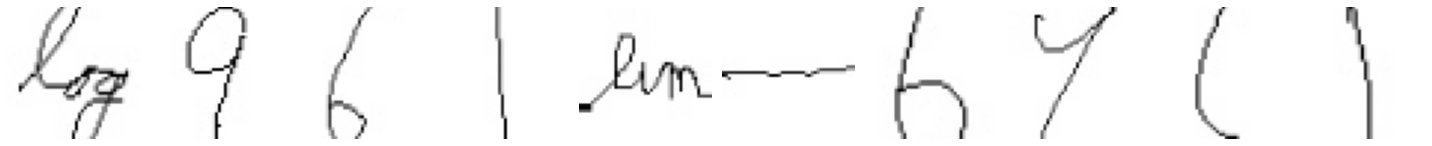

log
q
6
1
lim
-
6
y
(
1
X
pm
-
1
1
X
-
j
1
2
A
sqrt
sin
8
z
X
-
)
5
X
(
X


In [40]:
imgs, labels = next(train_set)

def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize = (20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
        ax.axis('off')
    plt.tight_layout()
    plt.show()
    
plotImages(imgs)
for i in range(32):
    print(symbol(labels[i]))

In [44]:
model = tf.keras.models.Sequential()

# First Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='same', activation='relu', input_shape=(45, 45, 1)))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Second Convolutional Block
model.add(tf.keras.layers.Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
model.add(tf.keras.layers.MaxPool2D(strides=2))

# Classifier Head
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(82, activation='softmax'))

In [45]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 45, 45, 32)        832       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 18, 18, 48)        38448     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 9, 9, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3888)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 512)               1991168   
_________________________________________________________________
dense_7 (Dense)              (None, 256)              

In [46]:
adam = tf.keras.optimizers.Adam(lr = 5e-4)
model.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.fit(train_set, validation_data = test_set, epochs = 50)

Epoch 1/50


2022-10-02 02:41:13.203041: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8810/8813 [============================>.] - ETA: 0s - loss: 0.5427 - accuracy: 0.8484

2022-10-02 02:43:27.539068: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


8813/8813 [==============================] - 170s 19ms/step - loss: 0.5426 - accuracy: 0.8484 - val_loss: 0.3072 - val_accuracy: 0.9054
Epoch 2/50
8813/8813 [==============================] - 168s 19ms/step - loss: 0.2590 - accuracy: 0.9201 - val_loss: 0.2298 - val_accuracy: 0.9277
Epoch 3/50
8813/8813 [==============================] - 171s 19ms/step - loss: 0.2020 - accuracy: 0.9361 - val_loss: 0.2092 - val_accuracy: 0.9327
Epoch 4/50
8813/8813 [==============================] - 168s 19ms/step - loss: 0.1748 - accuracy: 0.9436 - val_loss: 0.1723 - val_accuracy: 0.9455
Epoch 5/50
8813/8813 [==============================] - 166s 19ms/step - loss: 0.1546 - accuracy: 0.9503 - val_loss: 0.1596 - val_accuracy: 0.9486
Epoch 6/50
8813/8813 [==============================] - 163s 19ms/step - loss: 0.1395 - accuracy: 0.9547 - val_loss: 0.1558 - val_accuracy: 0.9493
Epoch 7/50
8813/8813 [==============================] - 163s 19ms/step - loss: 0.1287 - accuracy: 0.9577 - val_loss: 0.1369 - val

In [47]:
model.save("OurModel")

2022-10-02 04:58:41.670320: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: OurModel/assets


In [48]:
val_loss, val_accuracy = model.evaluate(test_set)
print(val_loss,val_accuracy)

2937/2937 [==============================] - 34s 11ms/step - loss: 0.0800 - accuracy: 0.9772
0.07995548844337463 0.9771728515625


In [49]:
def prediction(image_path):
    img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)
    plt.imshow(img, cmap = 'gray')
    img = cv.resize(img,(45, 45))
    norm_image = cv.normalize(img, None, alpha = 0, beta = 1, norm_type = cv.NORM_MINMAX, dtype = cv.CV_32F)
    norm_image = norm_image.reshape((norm_image.shape[0], norm_image.shape[1], 1))
    case = np.asarray([norm_image])
    pred = model.predict([case])    
    return 'Prediction: ' + symbol(pred)